In [87]:
import pandas as pd
from pandas import to_datetime
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [88]:
df_appl = pd.read_csv('aapl.us.csv')
df_ggl = pd.read_csv('googl.csv')
df_msft = pd.read_csv('msft.csv')
df_appl = df_appl[(df_appl['Date'] >= '2005-01-01')]
df_msft = df_msft[(df_msft['Date'] >= '1998-01-01')]

df_appl = df_appl[['Date', 'Close']]
df_ggl = df_ggl[['Date', 'Close']]
df_msft = df_msft[['Date', 'Close']]


In [81]:
df_appl.columns = ['ds', 'y']
df_appl['ds']= to_datetime(df_appl['ds'])
# create test dataset, remove last 12 months
train = df_appl[:2268]
test = df_appl[2268:]

In [90]:
# define the model
model = Prophet()
# fit the model
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [97]:
forecast = model.predict(test[['ds']])

          ds       yhat  yhat_lower  yhat_upper
0 2014-01-07  70.127197   59.707148   81.237744
1 2014-01-08  70.225225   59.591224   80.699726
2 2014-01-09  70.158213   59.618564   80.425824
3 2014-01-10  70.089156   58.969149   79.752379
4 2014-01-13  70.229369   59.064738   80.779773


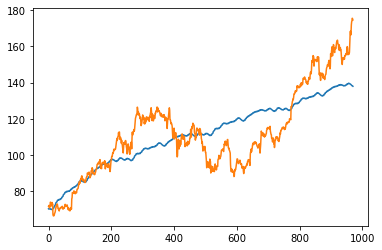

In [99]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
y_true = test['y'].values
y_pred = forecast['yhat'].values
plt.plot(y_pred)
plt.plot(y_true)
# plt.plot(true_close)

In [101]:
mae = mean_absolute_error(y_true, y_pred)
mae

11.69287296381412